# Datasets statistics

This notebook contain the different plots to analyse the data produce in the different datasets.

## Imports and arguments

*   Add in the variable "tables" the different paths of the dataset you want to visualize.

In [12]:
from plot_methods import (
    datasets_stats,
    load_template,
    plot_events_length, 
    plot_unique_events,
    plot_time_diff, 
    plot_level_dist, 
    plot_embeddings,
    plot_execution_graph
)

In [13]:
path = "../results/db/"

tables = {
    "Normal v1": f"{path}/test_normal_v1.csv",
    "Abnormal v1": f"{path}/test_abnormal_v1.csv",
    "Normal v2": f"{path}/test_normal_v2.csv",
    "Abnormal v2": f"{path}/test_abnormal_v2.csv",
}

template_path = f"{path}/template.csv"

## General stats

### Different datasets

In [14]:
datasets_stats(tables)

,Name,Size
0,Normal v1,10
1,Abnormal v1,10
2,Normal v2,10
3,Abnormal v2,10


### Overall template

In [15]:
load_template(template_path)

,Template,Event ID
0,NaN,0
1,Running in verification mode.,1
2,<*>simulation,2
3,Machine<*>has been<*>.,3
4,Loading...,4
5,Running...,5
6,Machine in verification mode.,6
7,Machine<*>is ready.,7
8,Running in measurement mode.,8
9,Machine in measurement mode.,9


## Event Statistics

Statistics that are obtain by analyzing the different id event sequences.

### Sequence length

The length distribution of the different event sequences.

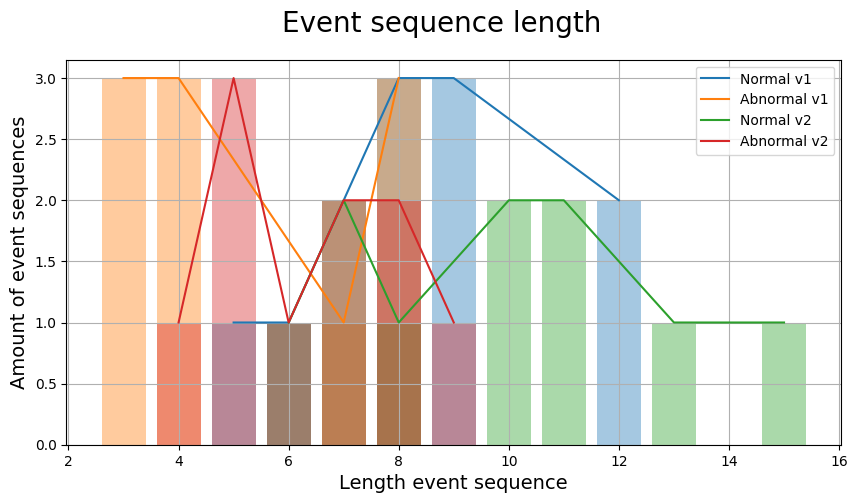

In [16]:
plot_events_length(tables)

### Evenet ID distribution

Event ID distribution of the different datasets

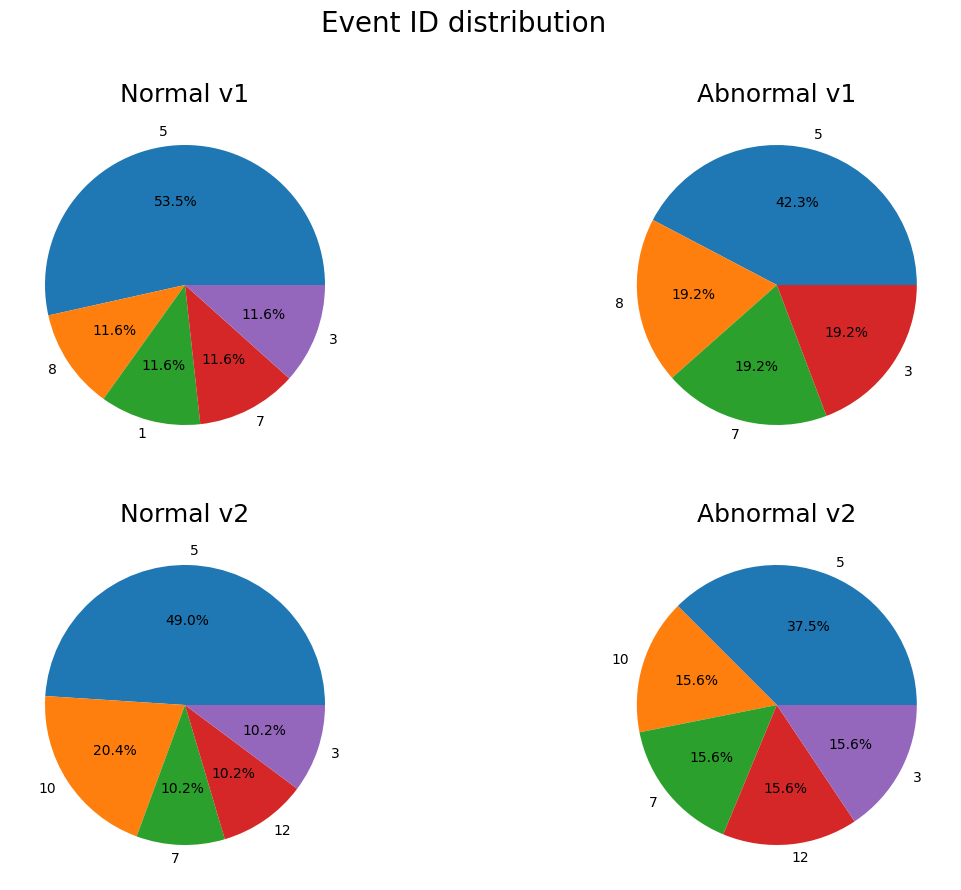

In [17]:
plot_unique_events(tables)

## Time Diff. Statistics

Time difference distribution between the first and the next event. In the plot we only show the first event.

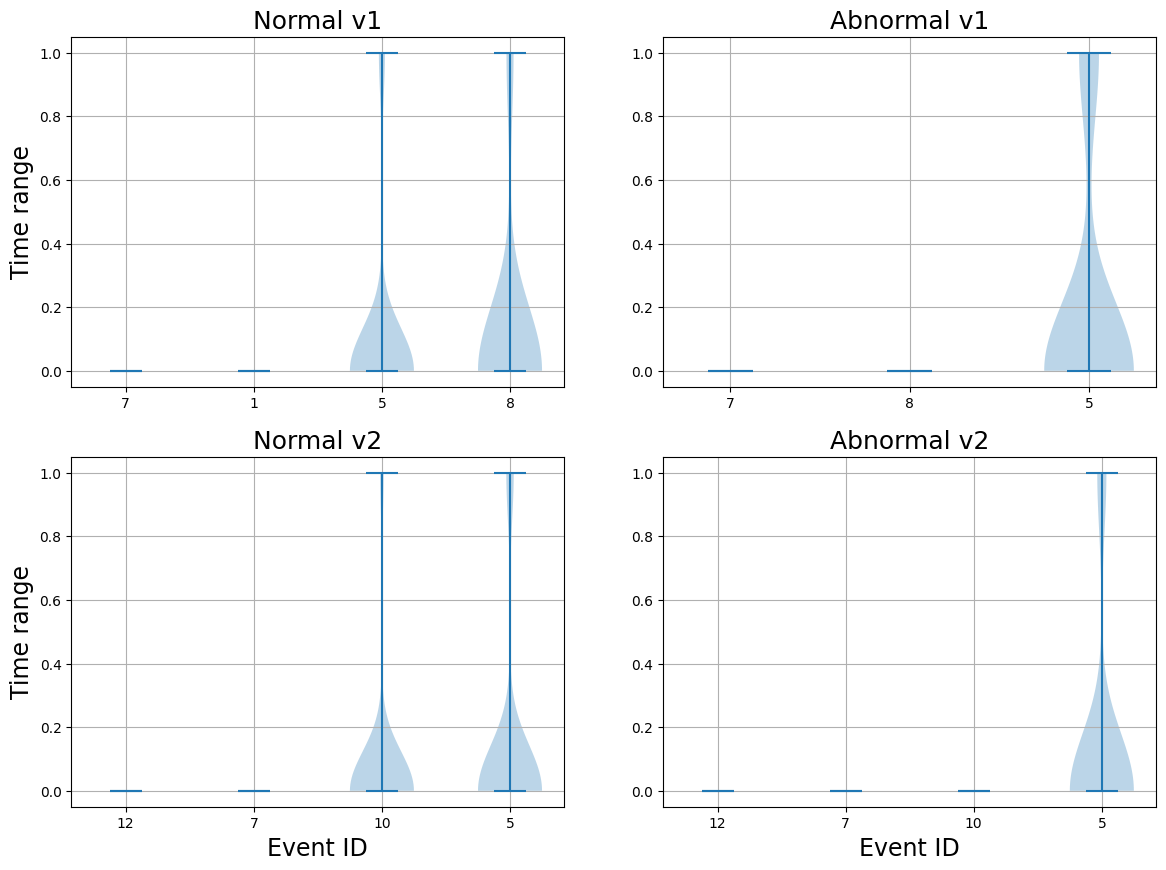

In [18]:
plot_time_diff(tables)

## Level log distribution

Pie plots of the log level distribution.

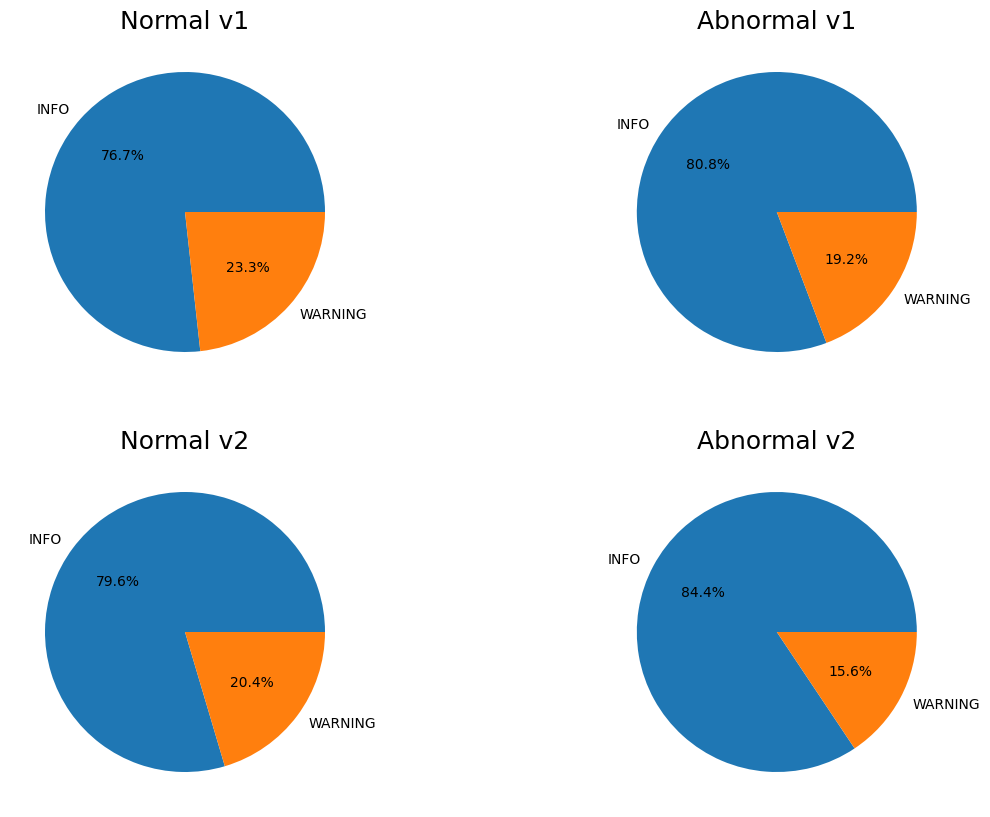

In [19]:
plot_level_dist(tables)

## Templates analysis

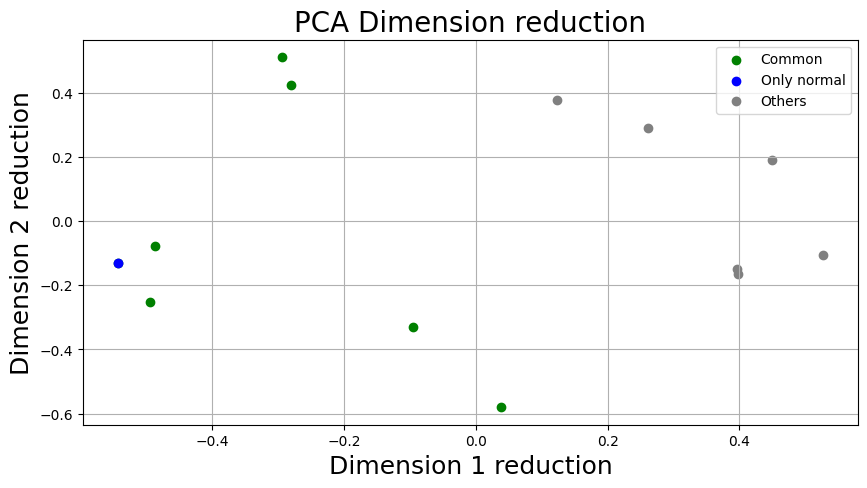

In [20]:
plot_embeddings(tables, "Template")

## Los message analysis

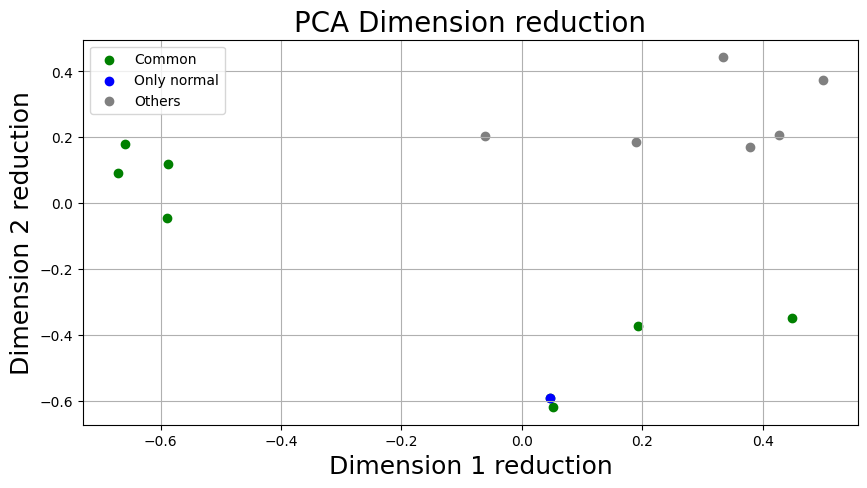

In [21]:
plot_embeddings(tables, "Content")

## Execution graph

Execution graphs of the code presented in graphs.

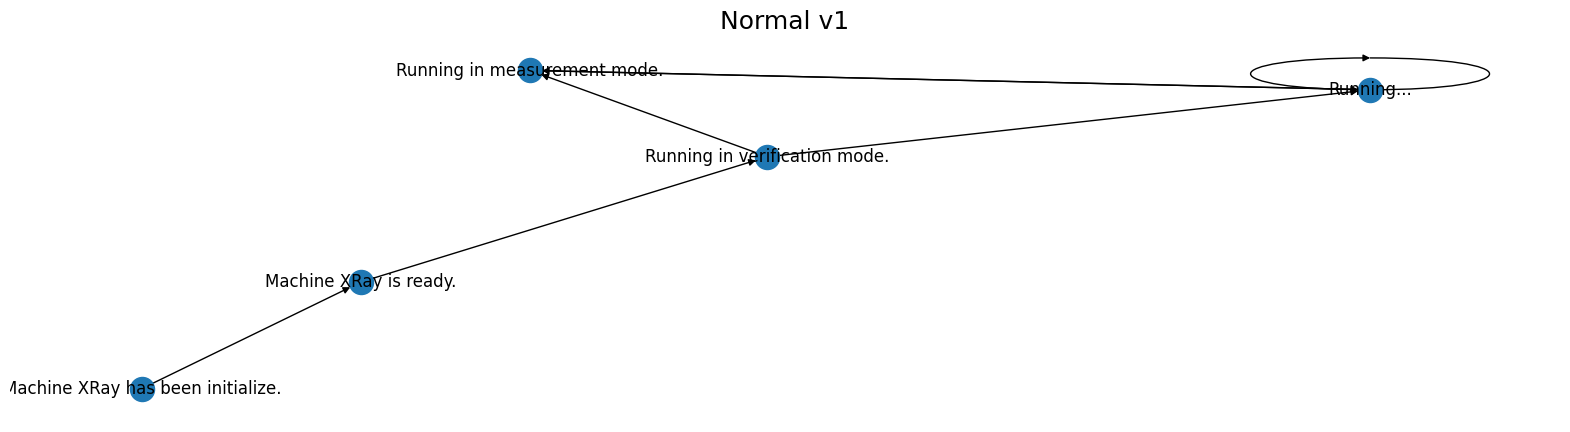

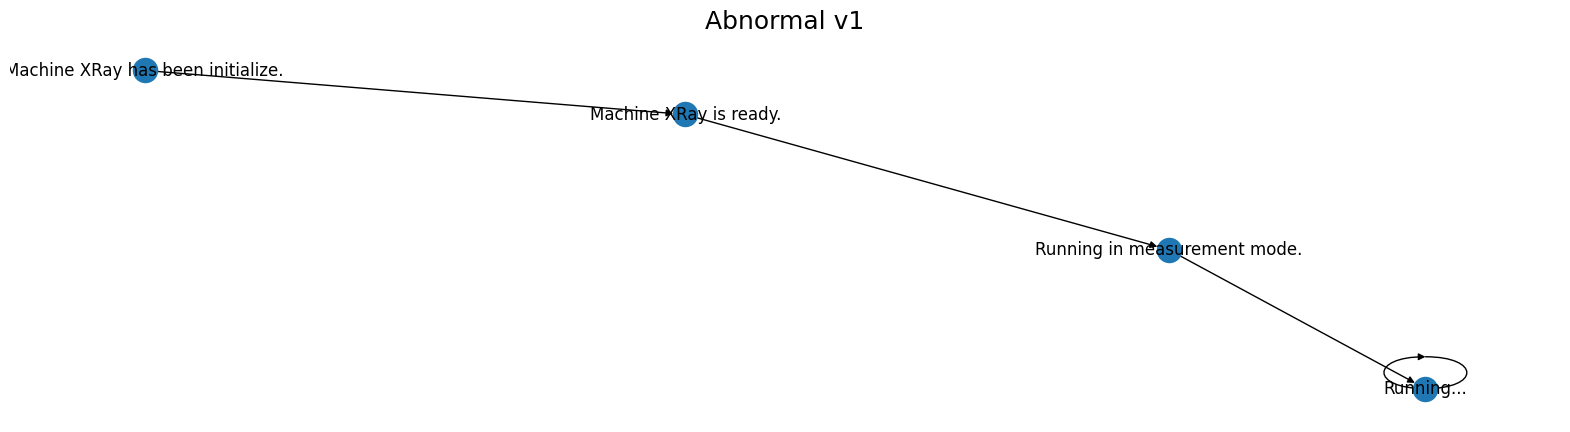

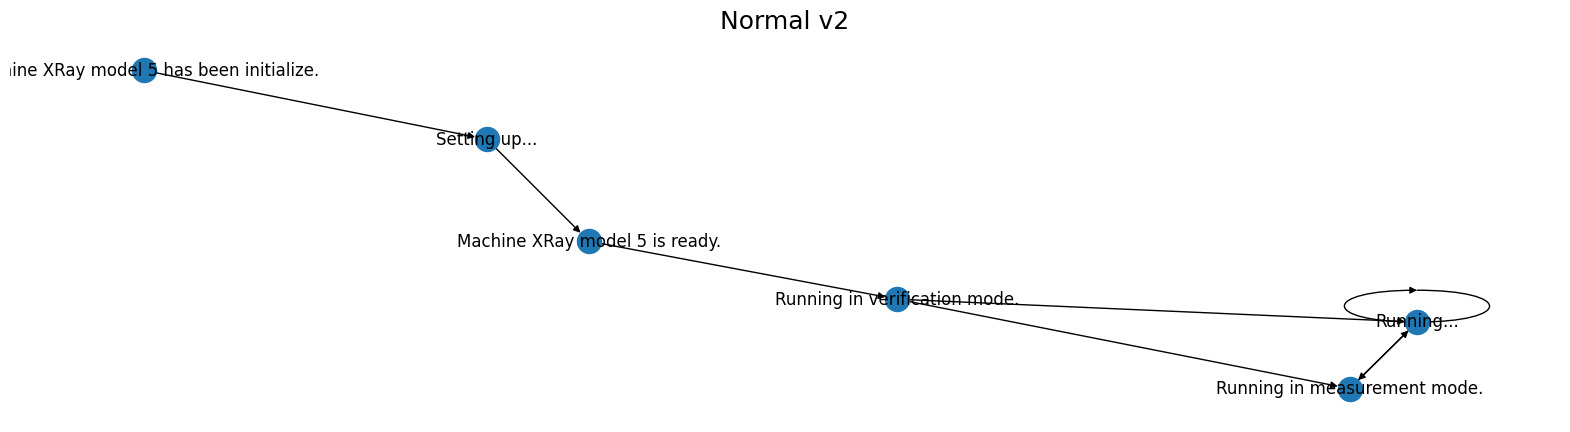

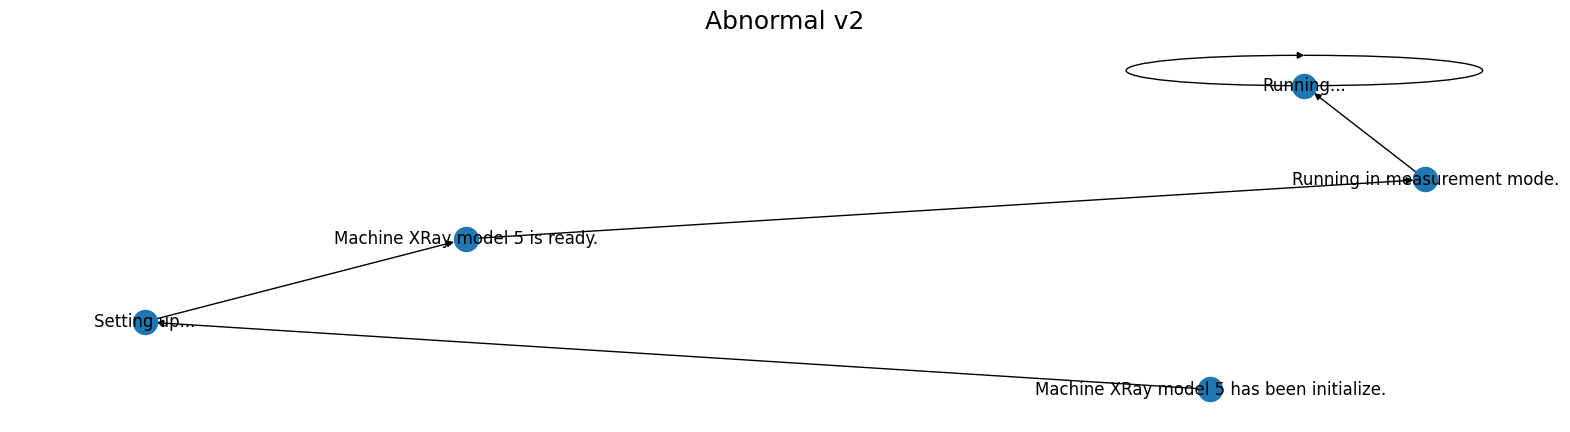

In [22]:
plot_execution_graph(tables)

In [23]:
tables

{'Normal v1': '../results/db//test_normal_v1.csv',
 'Abnormal v1': '../results/db//test_abnormal_v1.csv',
 'Normal v2': '../results/db//test_normal_v2.csv',
 'Abnormal v2': '../results/db//test_abnormal_v2.csv'}

In [76]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:

def get_vectors(table):
    seq_events = table["Event ID"].apply(lambda x: eval(x)).tolist()

    unique_ = set()
    for seq in seq_events:
        for event in seq:
            if event not in unique_:
                unique_.add(event) 
    unique_ = list(unique_)

    vectors = np.zeros((len(unique_), len(unique_)))
    for seq in seq_events:
        unique_values, counts = np.unique(seq, return_counts=True)
        for uniq_event in unique_:
            if uniq_event in unique_values:
                for value, count in zip(unique_values, counts):
                    vectors[unique_.index(uniq_event), unique_.index(value)] += count

    vectors = vectors / np.sum(vectors, axis=1)         
    return vectors, unique_


def do_count_plot(table, ax, fig):
    vectors, unique_ = get_vectors(table)
    
    cax = ax.imshow(vectors, vmin=0, vmax=1)
    ax.set_xticks(range(vectors.shape[0]), unique_)
    ax.set_yticks(range(vectors.shape[1]), unique_)
    ax.set_xlabel("Log event count", fontsize=15)
    ax.set_ylabel("Log event count", fontsize=15)
    fig.colorbar(cax, ax=ax)

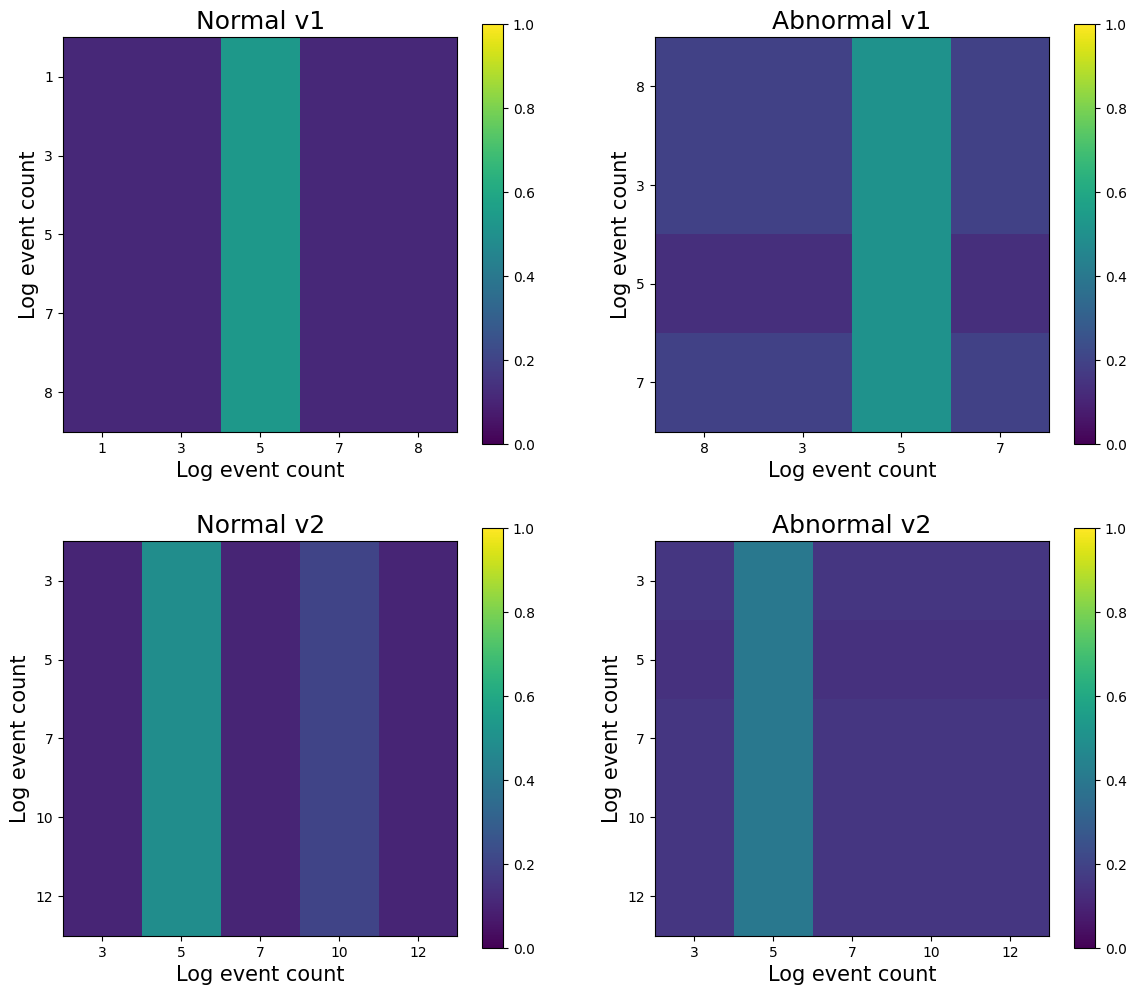

In [ ]:
def plot_count_vectors(tables):
    rows = math.ceil(len(tables) / 2)
    fig, axs = plt.subplots(rows, 2, figsize=(14, 12))

    for i, (name, path) in enumerate(tables.items()):
        row = math.floor(i / rows)
        column = i % rows
        axs[row, column].set_title(name, fontsize=18)
        do_count_plot(table_name=name, ax=axs[row, column], fig=fig)

In [88]:
vectors

array([[10., 10., 46., 10., 10.],
       [10., 10., 46., 10., 10.],
       [10., 10., 46., 10., 10.],
       [10., 10., 46., 10., 10.],
       [10., 10., 46., 10., 10.]])

In [90]:
np.sum(vectors, axis=1)

array([86., 86., 86., 86., 86.])